# 트리 알고리즘

## 결정트리
- 비선형 데이터

In [1]:
import pandas as pd

red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
red_wine['class'] = 0
red_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [3]:
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
white_wine['class'] = 1
white_wine.head()

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1


In [4]:
# concat() : 두개의 데이터 프레임을 위아래로 연결
wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


In [5]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target)

In [10]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7805829228243021
0.7833846153846153


C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
print(lr.coef_, lr.intercept_)

[[ 0.53018938  1.67796715 -0.70137281]] [1.75800349]


In [13]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() 
# dt.fit(train_scaled, train_target)
dt.fit(train_input, train_target)

# print(dt.score(train_scaled, train_target))
# print(dt.score(test_scaled, test_target))
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9969211822660099
0.8566153846153847


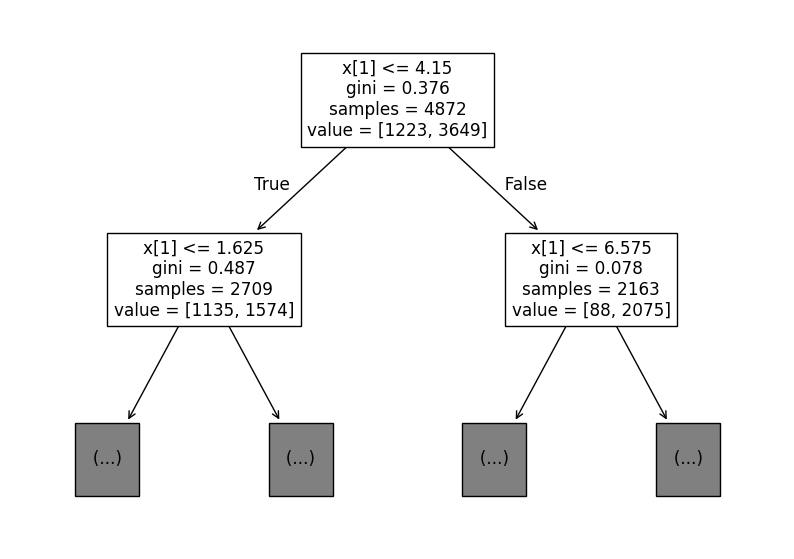

In [15]:
# 결정트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7)) # 크기
plot_tree(dt, max_depth=1) # max_depth=1 : 트리 구조의 상단만 출력
plt.show()
# gini(지니 불순도) : 데이터 트리가 얼마나 한쪽으로 편향되어있는지, 낮을수록 좋음

### 가지치기

In [ ]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3) 
# max_depth=3으로 주니까 과대적합은 해결, 정확도는 떨어짐
# dt.fit(train_scaled, train_target)
dt.fit(train_input, train_target)

# print(dt.score(train_scaled, train_target))
# print(dt.score(test_scaled, test_target))
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))